In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
macro_data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


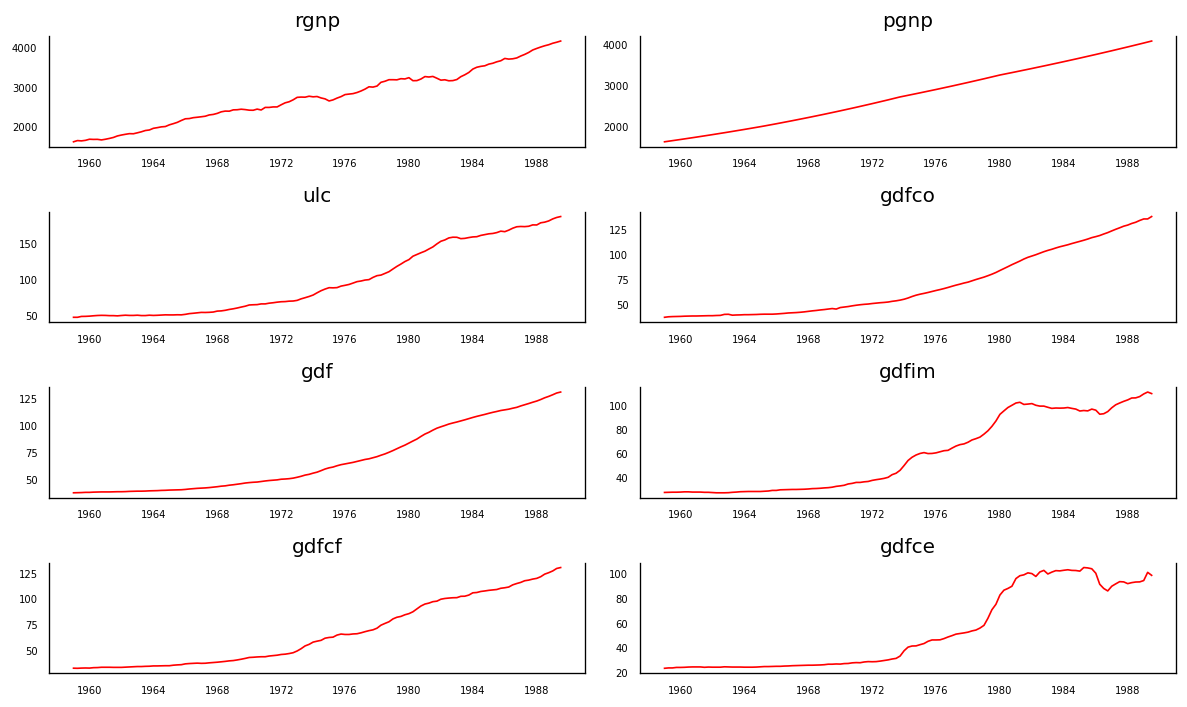

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [4]:
ad_fuller_result_1 = adfuller(macro_data['rgnp'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['ulc'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -5.427594381007334
p-value: 2.9633019848468996e-06

---------------------

realcons
ADF Statistic: -3.576080473150911
p-value: 0.006235131830238172


In [6]:
print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['ulc', 'rgnp']], 2)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['rgnp', 'ulc']], 2)

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=22.9444 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0242 , p=0.0000  , df=1
parameter F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=16.1029 , p=0.0003  , df=2
likelihood ratio test: chi2=15.1179 , p=0.0005  , df=2
parameter F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2

ulc causes rgnp?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3729  , p=0.5426  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=0.3823  , p=0.5364  , df=1
likelihood ratio test: chi2=0.3817  , p=0.5367  , df=1
parameter F test:         F=0.3729  , p=0.5426  , df_denom=119, df_num=1

Granger Causality


In [7]:
macro_data = macro_data[['ulc','rgnp']]
print(macro_data.shape)

train_df=macro_data[:-12]
test_df=macro_data[-12:]

(123, 2)


In [9]:
model = VAR(train_df.diff()[1:])
sorted_order=model.select_order(maxlags=10)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.747       6.799       851.1       6.768
1        5.863      6.019*       351.7       5.926
2        5.799       6.060       330.1       5.905
3        5.769       6.133       320.2       5.916
4       5.631*       6.100      279.3*      5.821*
5        5.701       6.274       299.7       5.933
6        5.646       6.324       284.1       5.921
7        5.710       6.491       303.2       6.026
8        5.705       6.591       302.5       6.064
9        5.750       6.740       317.0       6.150
10       5.750       6.845       318.3       6.193
--------------------------------------------------


In [34]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11857.543
                          + intercept   AIC                          23757.085
Date:                Sun, 19 May 2024   BIC                          23813.985
Time:                        13:52:44   HQIC                         23780.168
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):          37.30, 106.08   Jarque-Bera (JB):         24.64, 13.83
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.66, 0.27   Skew:                      0.69, -0.86
Prob(H) (two-sided):            0.13,

<AxesSubplot:>

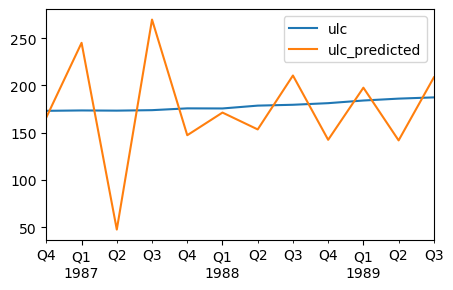

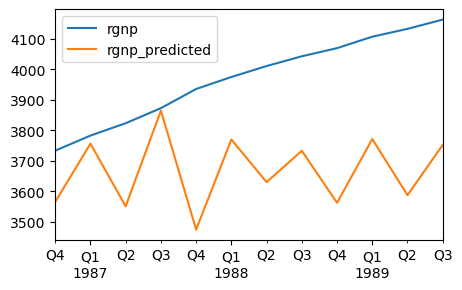

In [35]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean
predictions.columns=['ulc_predicted','rgnp_predicted']
test_vs_pred=pd.concat([test_df,predictions],axis=1)
test_vs_pred[{'ulc', 'ulc_predicted'}].plot(figsize=(5,3))
test_vs_pred[{'rgnp','rgnp_predicted'}].plot(figsize=(5,3))

In [36]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['ulc_predicted'],test_df['ulc']))
print('Mean value of ULC is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['ulc']),rmse_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['rgnp_predicted'],test_df['rgnp']))
print('Mean value of RGNP is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['rgnp']),rmse_rgnp))

Mean value of ULC is : 178.56666666666666. Root Mean Squared Error is :55.25422024195209
Mean value of RGNP is : 3970.6916666666666. Root Mean Squared Error is :345.35063572872764
